<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Aula 12 - Forecasting - Previsões Para Séries Temporais - Exponential Smoothing</font></b></strong>

Para fazer previsões com séries temporais temos diversos algoritmos divididos nestas categorias principais:

<b>- Modelos de Regressão de Séries Temporais</b>

O conceito básico é prever a série temporal de interesse y supondo que ela tenha uma relação linear com outras séries temporais x.

Por exemplo, podemos desejar prever vendas mensais y usando o gasto total com publicidade x como um preditor. Ou podemos prever a demanda diária de eletricidade y usando temperatura x1 e o dia da semana x2 como preditores.

A variável y às vezes também é chamada de variável regressante, dependente ou explicada. As variáveis preditoras x às vezes também são chamados de regressores, variáveis independentes ou explicativas.

<b>- Exponential Smoothing</b>

A "suavização exponencial" foi proposta no final da década de 1950 (Brown, 1959; Holt, 1957; Winters, 1960) e motivou alguns dos métodos de previsão mais bem-sucedidos. As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações "envelhecem". Em outras palavras, quanto mais recente a observação, maior o peso associado. Essa estrutura gera previsões confiáveis rapidamente e para uma ampla gama de séries temporais, o que é uma grande vantagem e de grande importância para muitas aplicações comerciais.

<b>- Modelos ARIMA (Autoregressive Integrated Moving Average)</b>

Os modelos ARIMA fornecem outra abordagem para a previsão de séries temporais. A suavização exponencial e os modelos ARIMA são as duas abordagens mais usadas para previsão de séries temporais e fornecem abordagens complementares. Embora os modelos de suavização exponencial sejam baseados em uma descrição da tendência e da sazonalidade nos dados, os modelos ARIMA visam descrever as correlações automáticas nos dados.

<b>- Modelos de Regressão Dinâmica</b>

Os modelos de Regressão de Séries Temporais, Exponential Smoothing e ARIMA, permitem a inclusão de informações de observações anteriores de uma série, mas não a inclusão de outras informações que também possam ser relevantes. Por exemplo, os efeitos de feriados, atividade da concorrência, mudanças na lei, economia em geral ou outras variáveis externas podem explicar algumas das variações históricas e levar a previsões mais precisas.

<b>- Modelos Hierárquicos ou de Séries Agrupadas</b>

As séries temporais geralmente podem ser desagregadas naturalmente por vários atributos de interesse. Por exemplo, o número total de bicicletas vendidas por um fabricante de bicicletas pode ser desagregado por tipo de produto, como bicicletas comuns, mountain bikes, bicicletas infantis e híbridos. Cada um deles pode ser desagregado em categorias mais refinadas. Por exemplo, as bicicletas híbridas podem ser divididas em bicicletas urbanas, de transporte, conforto e trekking, e assim por diante. Essas categorias são aninhadas nas categorias de grupos maiores e, portanto, a coleção de séries temporais segue uma estrutura de agregação hierárquica. Portanto, nos referimos a eles como "séries temporais hierárquicas".

Séries temporais hierárquicas geralmente surgem devido a divisões geográficas. Por exemplo, o total de vendas de bicicletas pode ser desagregado por país, depois dentro de cada país por estado, dentro de cada estado por região e assim por diante até o nível da tomada.

<b>- Métodos Avançados de Previsão de Séries Temporais</b>

Aqui nós temos técnicas de Combinações, Backcasting, Intervalos Para Agregações e Deep Learning (especialmente com modelos LSTM).

### Carregando os Pacotes Usados Neste Jupyter Notebook


In [3]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.

!pip install -q -U watermark

You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
# The new versions of Pandas and Matplotlib bring several warning messages to the desenvolper. Lets's disable this. 
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports for data manipulatioo
import numpy as np
import pandas as pd
from datetime import datetime


# Imports for data vasualization
import matplotlib.pyplot as plt
import matplotlib as m

# Imports for predictive modeling
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports for metrics and model performance
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports for formatting graphics 
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [5]:
#Versions of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Data Scientist Rodolfo Terra" --iversions

Author: Data Scientist Rodolfo Terra

statsmodels: 0.11.1
pandas     : 1.1.1
numpy      : 1.18.2
sklearn    : 0.23.2
matplotlib : 3.3.1
sys        : 3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]



### Definição do Problema de Negócio

A HappyMoonVC é uma Venture Capital (VC).

Venture Capital (VC) é um tipo de fundo de investimento focado em capital de crescimento para empresas de médio porte que já possuem carteira de clientes e receita, mas que ainda precisam dar um salto de crescimento.

VCs investem em empresas iniciantes, Startups e emergentes que foram consideradas com alto potencial de crescimento ou que demonstraram alto crescimento (em termos de número de funcionários, receita anual ou ambos).

A HappyMoonVC está analisando um novo e promissor negócio sugerido por uma Startup, o GoInRail.

O GoInRail é um método de transporte inovador que usa a tecnologia de propulsão a jato para executar um veículo similar a um Drone, mas sobre trilhos (que mantém o Drone carregado com energia elétrica) e transportar pessoas em alta velocidade!

O investimento só fará sentido se o GoInRail conseguir mais de 1 milhão de usuários mensais nos próximos 18 meses.

Nosso trabalho é analisar dados de séries temporais com a demanda de transporte em uma determinada região e prever a demanda pelo GoInRail, que ajude a HappyMoonVC a tomar sua decisão de investimento.

### Conjunto de Dados

Usaremos conjuntos de dados fictícios que mostram a demanda de clientes por transporte em uma determinada região. Para cada dia da semana, foi contabilizado quantas pessoas usaram o sistema de transporte na região. Os dados tem registros dos anos de 2017, 2018 e 2019.

São fornecidos 2 datasets:

O primeiro possui 3 colunas, com id, data e total de clientes que usaram algum tipo de transporte. Será nossos dados de treino.

O segundo possui 2 colunas, com id e data para os anos de 2019 e 2020. Será nosso dataset de teste.

In [6]:
# Loa the data
dados_treino = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset4.csv")
dados_teste = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset5.csv")

In [7]:
#Convert the Datetime column to the correct type
dados_treino['Datetime'] = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%Y %H:%M')

In [8]:
#Convert the Datetime column to the correct type
dados_teste['Datetime'] = pd.to_datetime(dados_teste.Datetime, format = '%d-%m-%Y %H:%M')

In [9]:
# Let's extract the details from the Datetime column: year, month, day and time

for i in (dados_treino, dados_teste):
    i['ano'] = i.Datetime.dt.year
    i['mes'] = i.Datetime.dt.month
    i['dia'] = i.Datetime.dt.day
    i['hora'] = i.Datetime.dt.hour

In [10]:
# We need the day of the week too
dados_treino['dia_semana'] = dados_treino['Datetime'].dt.dayofweek

In [11]:
# It would be good to check if the fact that it is a weekend or not impacts the use of transportation.
# Let's extract this information. Days of the week equal to 5 or 6 are Saturday and Sunday.

# We created a function, where we mark weekends as 1 and working days as 0
def converteFimSemana(registro):
    if registro.dayofweek == 5 or registro.dayofweek == 6:
        return 1
    else:
        return 0

In [12]:
# Now we apply the function
dados_treino['final_semana'] = dados_treino['Datetime'].apply(converteFimSemana)

In [13]:
# Let's see how the dataset looks
dados_treino.head()

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana,final_semana
0,0,2017-08-25 00:00:00,8,2017,8,25,0,4,0
1,1,2017-08-25 01:00:00,2,2017,8,25,1,4,0
2,2,2017-08-25 02:00:00,6,2017,8,25,2,4,0
3,3,2017-08-25 03:00:00,2,2017,8,25,3,4,0
4,4,2017-08-25 04:00:00,2,2017,8,25,4,4,0


In [14]:
# We refine the data for the original series chart

# We define the index of the dataset
dados_treino.index = dados_treino['Datetime']

# We removed the ID column, as it is not relevant in this case
features = dados_treino.drop('ID',1)

# The Count variable is our target variable (total people who used transportation)
target = dados_treino['Count']

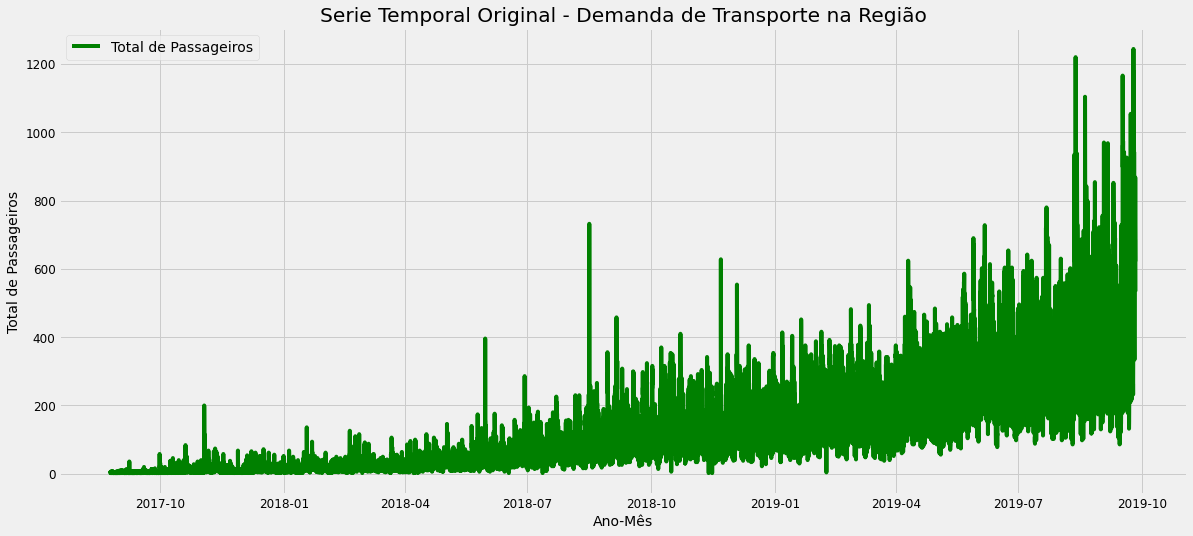

In [15]:
# Plot
plt.title("Serie Temporal Original - Demanda de Transporte na Região")
plt.plot(target, label = "Total de Passageiros", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Passageiros")
plt.legend(loc = "best")

Vamos testar a estacionaridade da série.

In [16]:
# Function to test stationarity

def testa_estacionaridade(serie):
    
    # Calculates mobile statistcs
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()
    
    # Plot of mobile statistics
    orig = plt.plot(serie, color ='blue', label = "Original")
    mean = plt.plot(rolmean, color = 'red', label = 'Média Padrão')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Dickey-Fuller teste:
    # Print
    print(('\nResultado do Teste Dickey-Fuller:\n'))
    
    # Test
    dfteste = adfuller(serie,autolag = 'AIC')
    
    # Formatting the output
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])
    
    # Loop for each test output item 
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)' %key] = value
        
    # Print
    print(dfsaida)
    
    # Tests the p-value
    print('\nConclusão:')
    if dfsaida[1] >0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

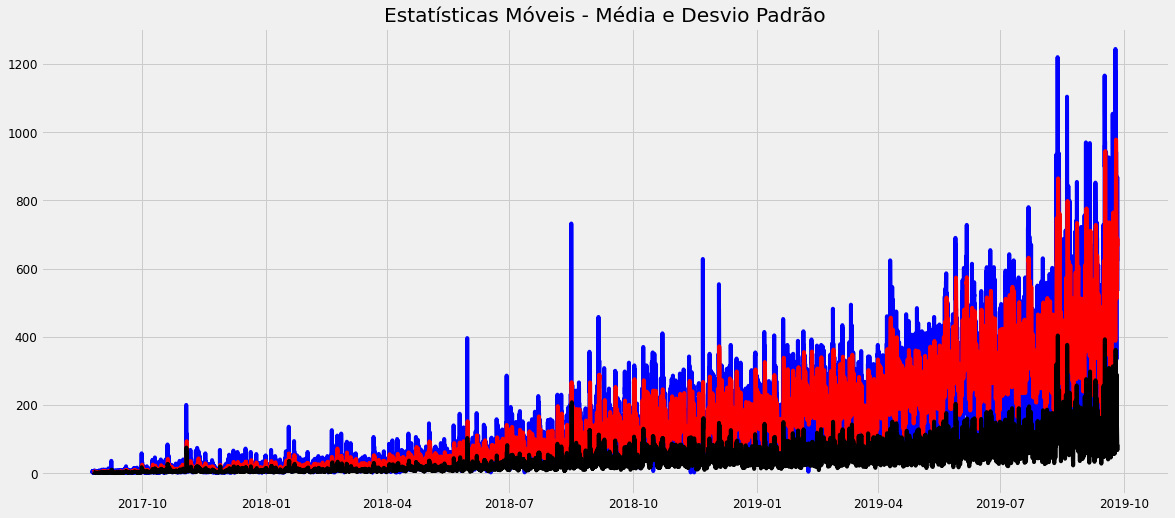


Resultado do Teste Dickey-Fuller:

Estatística do Teste               -4.456561
Valor-p                             0.000235
Número de Lags Consideradas        45.000000
Número de Observações Usadas    18242.000000
Valor Crítico (1%)                 -3.430709
Valor Crítico (5%)                 -2.861698
Valor Crítico (10%)                -2.566854
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [17]:
# Apply the function
testa_estacionaridade(dados_treino['Count'])

A série já é estacionária.

Vamos decompor a série e analisar seus componentes em separado.

In [18]:
# Decomposing the time series
decomposition = seasonal_decompose(dados_treino['Count'])

In [19]:
# Extracting each component of the series
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

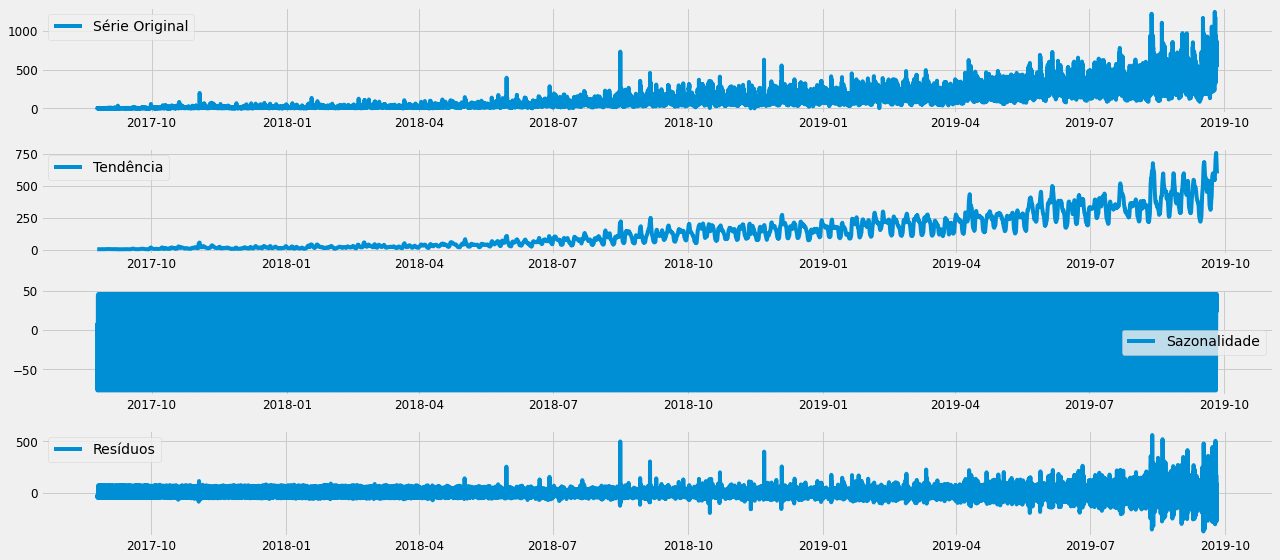

In [20]:
# Plot
plt.subplot(411)
plt.plot(dados_treino['Count'], label = 'Série Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Resíduos')
plt.legend(loc = 'best')
plt.tight_layout()

A série não apresenta sazonalidade, mas percebemos claramente a tendência e algum ruído.

Dependendo do modelo de previsão usado, a tendência teria que ser removida. Mas como usamos o modelo de suavização exponencial, isso não é necessário, pois esse modelo trata a tendência presente na série, como veremos mais abaixo.

Essa série é aditiva ou multiplicativa? Vamos checar.

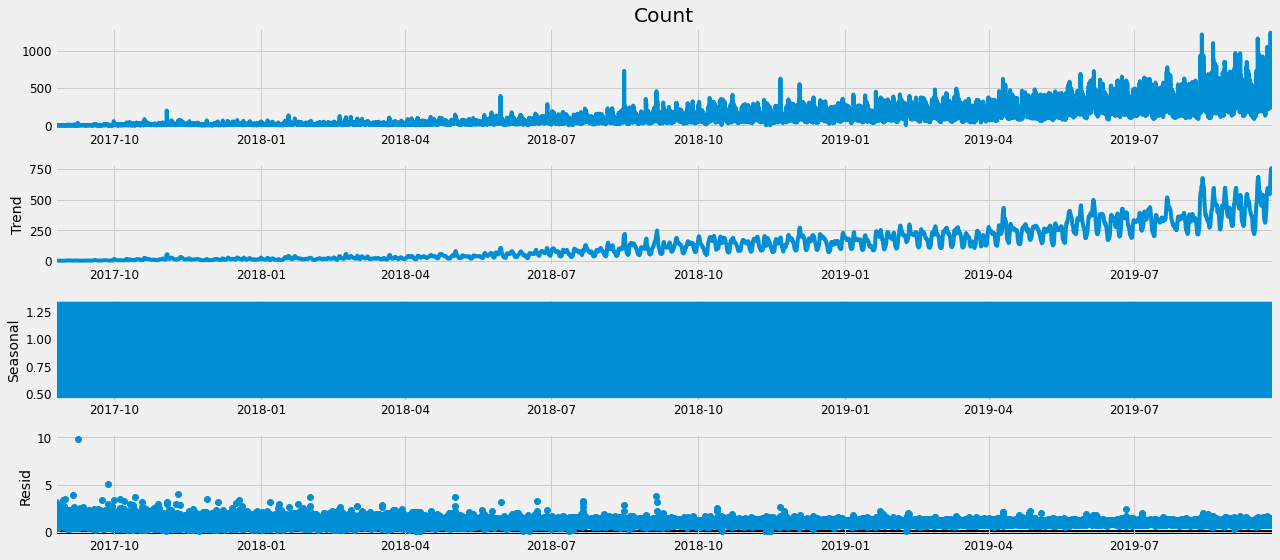

In [21]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(dados_treino['Count'], model = 'multiplicative', extrapolate_trend = 'freq')

# Plot
result_mul.plot()
plt.show()

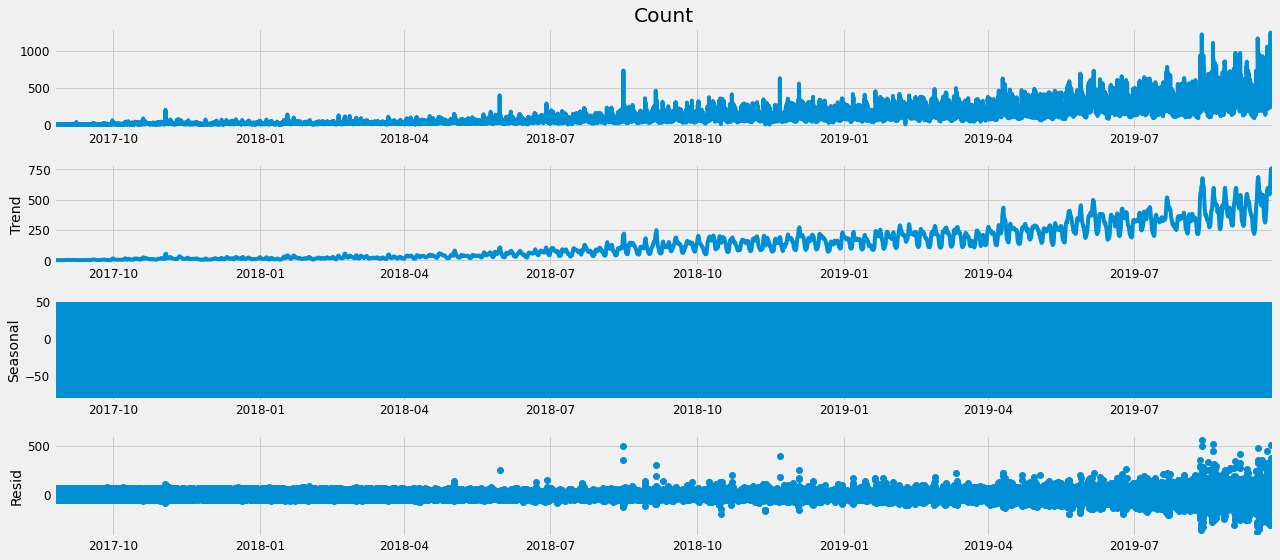

In [22]:
# Additive Decomposition
result_add = seasonal_decompose(dados_treino['Count'], model = 'additive', extrapolate_trend = 'freq')

# Plot
result_add.plot()
plt.show()

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série.

Os resíduos não podem ter um padrão. Nesse caso, vemos um leve padrão em ambos os casos. Por hora isso não é relevante e podemos usar uma série ou outra, aditiva ou multiplicativa.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria variável result_mul. Vamos extraí-los e colocá-los em um dataframe.

In [23]:
# Extracting the Components
# Observations = (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis = 1)
df_reconstructed.columns = ['Seasonal', 'Trend', 'Resid', 'Valores_Observados']
df_reconstructed.head()

,Seasonal,Trend,Resid,Valores_Observados
Datetime,,,,
2017-08-25 00:00:00,1.135457,2.618080,2.691140,8.0
2017-08-25 01:00:00,0.906008,2.642754,0.835298,2.0
2017-08-25 02:00:00,0.767480,2.667428,2.930836,6.0
2017-08-25 03:00:00,0.634250,2.692101,1.171327,2.0
2017-08-25 04:00:00,0.544107,2.716775,1.352982,2.0


### Pré-Processamento

In [31]:
# Training data will be divided into training and validation data.
# Note that the records are separated in chronological order.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

## Forecasting - Modelagem Preditiva Para Séries Temporais

<b>Exponential Smoothing</b>

A suavização exponencial é um método de previsão de séries temporais para dados univariados.

Métodos de séries temporais, como a família de métodos Box-Jenkins ARIMA, desenvolvem um modelo em que a previsão é uma soma linear ponderada de observações ou atrasos (lags) recentes.

Os métodos de previsão de suavização exponencial são semelhantes, pois uma previsão é uma soma ponderada de observações passadas, mas o modelo usa explicitamente um peso decrescente exponencialmente para observações passadas. Especificamente, observações passadas são ponderadas com uma proporção que diminui geometricamente.

As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações envelhecem. Em outras palavras, quanto mais recente a observação, maior o peso associado.

Os métodos de suavização exponencial podem ser considerados uma alternativa à popular classe de métodos Box-Jenkins ARIMA para previsão de séries temporais.

Coletivamente, os métodos às vezes são chamados de modelos ETS, referindo-se à modelagem explícita de Erro, Tendência e Sazonalidade.

<b>Tipos de Suavização Exponencial</b>

Existem três tipos principais de métodos de previsão de séries temporais de suavização exponencial:

Um método simples que não assume estrutura sistemática, uma extensão que lida explicitamente com as tendências e a abordagem mais avançada que adiciona suporte à sazonalidade. Vamos definir cada um deles.

<b>Suavização Exponencial Simples</b>

Suavização exponencial simples, o SES, é um método de previsão de séries temporais para dados univariados sem tendência ou sazonalidade.

Requer um único parâmetro, chamado alfa (a), também chamado de fator de suavização ou coeficiente de suavização.

Este parâmetro controla a taxa na qual a influência das observações em etapas anteriores decai exponencialmente. Alfa geralmente é definido como um valor entre 0 e 1. Valores grandes significam que o modelo presta atenção principalmente às observações passadas mais recentes, enquanto valores menores significam que mais da história é levada em consideração ao fazer uma previsão.

Um valor próximo a 1 indica aprendizado rápido (ou seja, apenas os valores mais recentes influenciam as previsões), enquanto um valor próximo a 0 indica aprendizado lento (observações anteriores têm uma grande influência nas previsões).

<b>Suavização Exponencial Dupla</b>

A suavização exponencial dupla é uma extensão da suavização exponencial que adiciona explicitamente suporte para tendências na série temporal univariada.

Além do parâmetro alfa para controlar o fator de suavização, um fator de suavização adicional é adicionado para controlar a deterioração da influência da mudança na tendência chamada beta (b).

O método suporta tendências que mudam de maneiras diferentes: um aditivo e um multiplicativo, dependendo se a tendência é linear ou exponencial, respectivamente.

A suavização exponencial dupla com uma tendência aditiva é classicamente chamada de modelo de tendência linear de Holt, homenagem ao desenvolvedor do método, Charles Holt.

Tendência aditiva: Suavização exponencial dupla com uma tendência linear.
Tendência multiplicativa: Suavização exponencial dupla com uma tendência exponencial.
Para previsões de longo alcance (várias etapas), a tendência pode continuar irrealisticamente. Como tal, pode ser útil diminuir a tendência ao longo do tempo.

<b>Suavização Exponencial Tripla</b>

A suavização exponencial tripla é uma extensão da suavização exponencial que adiciona explicitamente suporte à sazonalidade à série temporal univariada.

Às vezes, esse método é chamado de suavização exponencial de Holt-Winters, homenagem aos dois colaboradores do método: Charles Holt e Peter Winters.

Além dos fatores de suavização alfa e beta, é adicionado um novo parâmetro chamado gama (g) que controla a influência no componente sazonal.

Como na tendência, a sazonalidade pode ser modelada como um processo aditivo ou multiplicativo para uma mudança linear ou exponencial na sazonalidade.

Sazonalidade aditiva: suavização exponencial tripla com uma sazonalidade linear.
Sazonalidade multiplicativa: Suavização exponencial tripla com uma sazonalidade exponencial.
A suavização exponencial tripla é a variação mais avançada da suavização exponencial e, através da configuração, também pode desenvolver modelos de suavização exponencial dupla e única.

Vamos criar dois modelos de Suavização Exponencial usando o Statsmodels.

In [32]:
# Versão 1 do modelo - Simple Exponential Smoothing
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

# A função SimpleExpSmoothing() recebe os dados de treino no formato de array numpy
# A função fit() faz o treinamento

# O hiperparâmetro smoothing_level define o nível de suavização exponencial na série
# O hiperparâmetro optimized define se teremos ou não otimização 

# Versão 1 do modelo - Simple Exponential Smoothing 
modelo_v1 = SimpleExpSmoothing(np.asarray(df_treino['Count'])).fit(smoothing_level = 0.8, optimized = True) 

In [33]:
# Prediction with the model
df_valid['previsoes_v1'] = modelo_v1.forecast(len(df_valid)) 

In [34]:
# We put side by side, actual value and "predicted" value
df_valid[['Count', 'previsoes_v1']].head()

,Count,previsoes_v1
Datetime,,
2019-06-25 02:00:00,218,342.564214
2019-06-25 03:00:00,244,342.564214
2019-06-25 04:00:00,168,342.564214
2019-06-25 05:00:00,140,342.564214
2019-06-25 06:00:00,156,342.564214


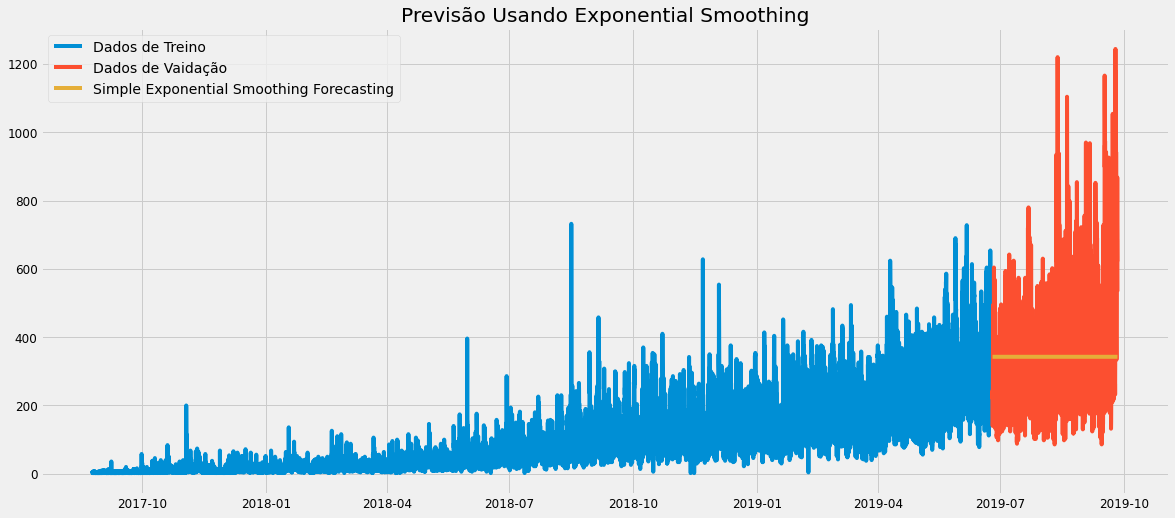

In [35]:
# Plot
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['Count'], label = 'Dados de Treino')
plt.plot(df_valid['Count'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v1'], label = 'Simple Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

Pronto! Temos a previsão da nossa série! Você apresentaria esse modelo ao investidor disposto a investir no seu negócio? Espero que não!

Esse modelo não é muito melhor do que nosso modelo base. Vamos calcular o erro do modelo.

In [37]:
# Dfines actual and predicted value
y_true = df_valid.Count
y_pred = df_valid.previsoes_v1

In [38]:
# Calculates the error using RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred))
print(metrica_rmse)

192.21990001982536


Nosso Modelo Base com o Método Naive obteve um RMSE de 195.06.

Nosso objetivo é reduzir o RMSE tanto quanto possível, pois essa métrica indica a taxa de erro do modelo. Reduzimos de 195.06 para 192.22. Ou seja, para essa série, um modelo de suavização exponencial simples não é muito melhor do que um modelo ingênuo (naive).

Será que conseguimos melhorar a performance do modelo preditivo? Vamos tentar outro tipo de suavização exponencial.


In [39]:
# Versão 2 do modelo - Double Exponential Smoothing 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

# Observe que estamos usando a função ExponentialSmoothing().
# Ao usar o hiperparâmetro trend, definimos o método Double Exponential Smoothing.
# Ao usar o hiperparâmetro seasonal, definimos o método Triple Exponential Smoothing.

# Vamos usar o Double. Como temos sazonalidade, não faz muito sentido usar o Triple.
# Escolhi a série aditiva
modelo_v2 = ExponentialSmoothing(np.asarray(df_treino['Count']), trend = 'additive').fit(smoothing_level = 0.8, 
                                                                                         optimized = True) 

In [40]:
# Prediction with the model

df_valid['previsoes_v2'] = modelo_v2.forecast(len(df_valid))

In [41]:
#We put side by side, actual valuie and predicted value
df_valid[['Count', 'previsoes_v1', 'previsoes_v2']].head()

,Count,previsoes_v1,previsoes_v2
Datetime,,,
2019-06-25 02:00:00,218,342.564214,342.590486
2019-06-25 03:00:00,244,342.564214,342.611503
2019-06-25 04:00:00,168,342.564214,342.632521
2019-06-25 05:00:00,140,342.564214,342.653538
2019-06-25 06:00:00,156,342.564214,342.674556


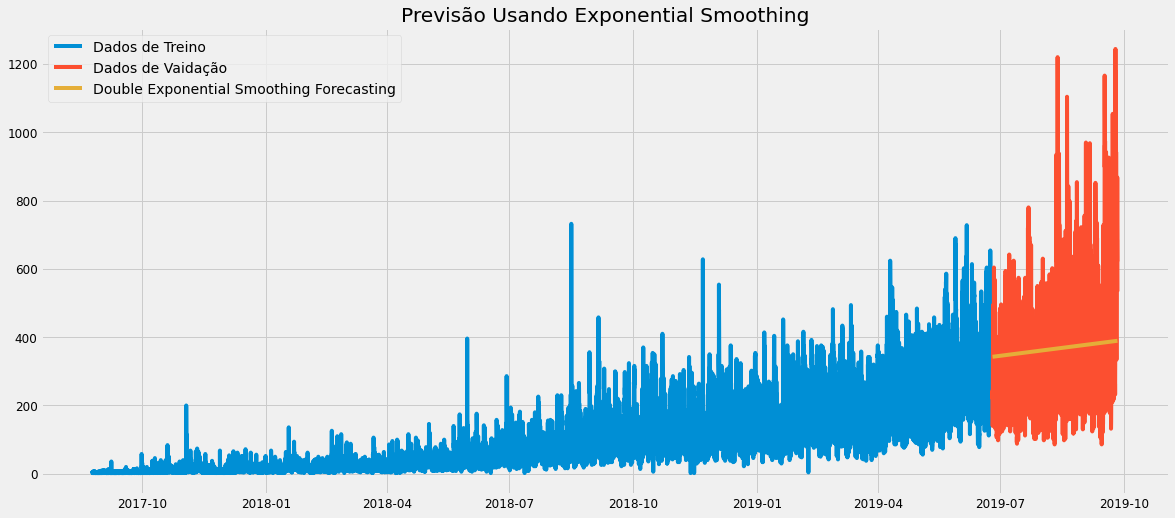

In [42]:
# Plot
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['Count'], label = 'Dados de Treino')
plt.plot(df_valid['Count'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v2'], label = 'Double Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

In [43]:
# Dfines actual and predicted value
y_true = df_valid.Count
y_pred = df_valid.previsoes_v2

In [44]:
# Calculates the error using RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred))
print(metrica_rmse)

184.17580107688119


Opa! Tivemos uma melhora razoável aqui. Observe a linha amarela no gráfico. Ela começou a subir. Nosso objetivo é deixá-la semelhante à linha laranja. Chegaremos lá.

Ainda não usamos os dados de teste, pois esses modelos que estamos estudando até aqui são básicos e temos opções bem mais avançadas que apresentarão resultados bem superiores. E então precisaremos dos dados de teste.